# Statystyczne metody przetwarzania danych 

## Laboratorium 5 - normalizacja, selekcja cech.


### Opis
Celem laboratorium jest przeprowadzenie normalizacji i selekcji cech.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab05.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:

#### Normalizacja
* Wczytaj dane.
* Znormalizuj dane (możesz użyć [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) z biblioteki scikit-learn.
* Przeprowadź eksperyment z zastosowaniem algorytmu [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) dla danych znormalizowanych oraz bez normalizacji.
    * W eksperymencie wybierz 5 klas oraz 10 losowych cech.
    * Dla danych znormalizowanych i bez normalizacji zastosuj te same cechy i klasy.
* Przedstaw porównanie wyników klasyfikacji na danych znormalizowanych i bez normalizacji.
* Napisz wnioski.


In [77]:
import numpy as np

#Import danych wraz z rozdziałem na zbiór testowy i treningowy
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

classes = [1, 4, 7, 11, 13]
features = [3, 4,5, 6, 7, 8, 9, 11, 13, 14]
train_new = train[np.isin(train[:,0], classes)]
test_new =  test[np.isin(test[:,0], classes)]
#print(test_new)


In [78]:

def Accuracy(testowa, predykcje):
    T =0
    for i in range(len(testowa)):
        if testowa[i,0] == predykcje[i]:
            T=T+1
    return T / len(test_new) * 100


In [80]:
## from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

k_nn_bez_norm = KNeighborsClassifier(n_neighbors= 3)
k_nn_bez_norm.fit(train_new[:,features], train_new[:,0])
k_nn_bez_norm_list = k_nn_bez_norm.predict(test_new[:,features])
#print(k_nn_bez_norm_list)
dok1 = Accuracy(test_new, k_nn_bez_norm_list)
print(dok1)


scaler = MinMaxScaler()
scaler.fit(train_new[:,2:])

przeskelowane_trenowane = scaler.transform(train_new[:,2:])
przeskalowane_testowe = scaler.transform(test_new[:,2:])

76.0


In [82]:
twos = np.ones(len(features), int)*2
features_new = features - twos
print(features_new)
przeskelowane_trenowane.shape
k_nn_norm = KNeighborsClassifier(n_neighbors= 3)
k_nn_norm.fit(przeskelowane_trenowane[:,features_new], train_new[:,0])
k_nn_norm_list = k_nn_norm.predict(przeskalowane_testowe[:,features_new])
dok10los = Accuracy(test_new, k_nn_norm_list)
print(dok10los)

[ 1  2  3  4  5  6  7  9 11 12]
84.0


# Wnioski:
Normalizacja cech zwiększa w znacznym stopniu poprawność wyniku

#### Selekcja cech
Na tym samym podzbiorze danych (co w poprzednim zadaniu).
* Przeprowadź selekcję cech (wybierz {2, 5} cech) za pomocą metod poznanych na wykładzie (np. z zastosowaniem współczynnika Fishera) lub istniejących implementacji z biblioteki [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html) (np. [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)).
* Przeprowadź klasyfikację na wybranych cechach.
* Porównaj wyniki klasyfikacji dla różnej liczby cech (z normalizacją):
    * 10 losowo wybranych cech (wynik z poprzedniego zadania),
    * 10 cech wybranych za pomocą algorytmu selekcji cech,
    * 5 losowo wybranych cech,
    * 5 cech wybranych za pomocą algorytmu selekcji cech,
    * 2 losowo wybrane cechy,
    * 2 cechy wybrane za pomocą algorytmu selekcji cech.
* Opisz wyniki i napisz wnioski. Postaraj się przedstawić wszystkie wyniki na jednym wykresie.


In [83]:
from sklearn.feature_selection import SelectKBest

train_new = train[np.isin(train[:,0], classes)]
test_new =  test[np.isin(test[:,0], classes)]

selector = SelectKBest(k=10).fit(przeskelowane_trenowane, train_new[:,0] )# wybieramy k "najlepszych" cech"
Wyselektowane_treningowe = selector.transform(przeskelowane_trenowane)# wykonujemy selekce na zbiorze
Wyselektowane_testowe = selector.transform(przeskalowane_testowe)# wykonujemy selekce na zbiorze

k_nn_bez_norm = KNeighborsClassifier(n_neighbors= 3)
k_nn_bez_norm.fit(Wyselektowane_treningowe, train_new[:,0])
k_nn_bez_norm_list = k_nn_bez_norm.predict(Wyselektowane_testowe)
#print(k_nn_bez_norm_list)
dok10wyb = Accuracy(test_new, k_nn_bez_norm_list)
print(dok10wyb)

87.63636363636364


In [85]:
selector = SelectKBest(k=5).fit(przeskelowane_trenowane, train_new[:,0] )# wybieramy k "najlepszych" cech"
Wyselektowane_treningowe = selector.transform(przeskelowane_trenowane)# wykonujemy selekce na zbiorze
Wyselektowane_testowe = selector.transform(przeskalowane_testowe)# wykonujemy selekce na zbiorze

k_nn_bez_norm = KNeighborsClassifier(n_neighbors= 3)
k_nn_bez_norm.fit(Wyselektowane_treningowe, train_new[:,0])
k_nn_bez_norm_list = k_nn_bez_norm.predict(Wyselektowane_testowe)
#print(k_nn_bez_norm_list)
dok5wyb = Accuracy(test_new, k_nn_bez_norm_list)
print(dok5wyb)

74.54545454545455


In [86]:
selector = SelectKBest(k=2).fit(przeskelowane_trenowane, train_new[:,0] )# wybieramy k "najlepszych" cech"
Wyselektowane_treningowe = selector.transform(przeskelowane_trenowane)# wykonujemy selekce na zbiorze
Wyselektowane_testowe = selector.transform(przeskalowane_testowe)# wykonujemy selekce na zbiorze

k_nn_bez_norm = KNeighborsClassifier(n_neighbors= 3)
k_nn_bez_norm.fit(Wyselektowane_treningowe, train_new[:,0])
k_nn_bez_norm_list = k_nn_bez_norm.predict(Wyselektowane_testowe)
#print(k_nn_bez_norm_list)
dok2wyb = Accuracy(test_new, k_nn_bez_norm_list)
print(dok2wyb)

69.45454545454545


In [87]:
features = [3, 4, 6, 8, 9]
twos = np.ones(len(features), int)*2
features_new = features - twos
print(features_new)
przeskelowane_trenowane.shape
k_nn_norm = KNeighborsClassifier(n_neighbors= 3)
k_nn_norm.fit(przeskelowane_trenowane[:,features_new], train_new[:,0])
k_nn_norm_list = k_nn_norm.predict(przeskalowane_testowe[:,features_new])
dok5los = Accuracy(test_new, k_nn_norm_list)
print(dok5los)

[1 2 4 6 7]
74.18181818181819


In [88]:
features = [3, 9]
twos = np.ones(len(features), int)*2
features_new = features - twos
print(features_new)
przeskelowane_trenowane.shape
k_nn_norm = KNeighborsClassifier(n_neighbors= 3)
k_nn_norm.fit(przeskelowane_trenowane[:,features_new], train_new[:,0])
k_nn_norm_list = k_nn_norm.predict(przeskalowane_testowe[:,features_new])
dok2los = Accuracy(test_new, k_nn_norm_list)
print(dok2los)

[1 7]
61.81818181818181


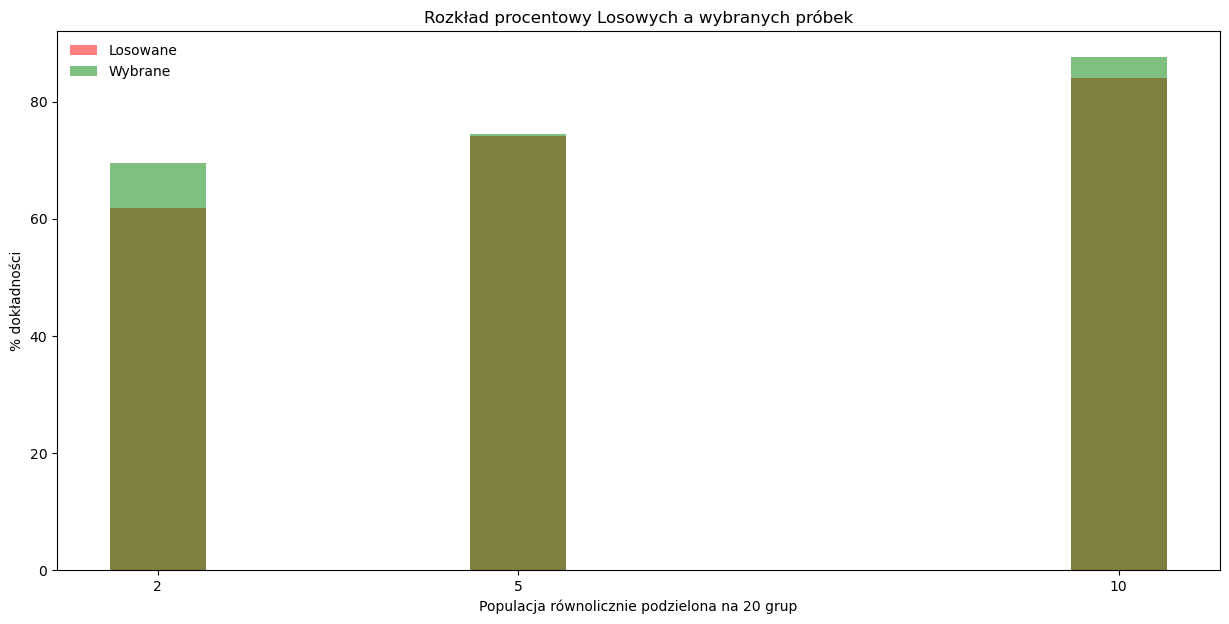

In [92]:
import numpy as np
import matplotlib.pyplot as plt

procent_bads = [dok10los, dok5los, dok2los]
procent_goods = [dok10wyb, dok5wyb,dok2wyb]
bars = (10,5,2)
 
plt.figure(figsize=(15, 7))
plt.bar(bars, procent_bads, color = 'red', alpha=0.5, label = 'Losowane')
plt.bar(bars, procent_goods, color = 'green', alpha=0.5, label = 'Wybrane')
 
plt.xticks(bars, bars)
 
plt.legend(frameon=False)
plt.xlabel('Populacja równolicznie podzielona na 20 grup')
plt.ylabel('% dokładności')
plt.title('Rozkład procentowy Losowych a wybranych próbek');

### Dla większej ilości cech wzrasta dokładność. Selekcja cech również poprawia dokładność. 